# Goal: 
### Develop a Q-Learning AI algorithm that can find the shortest distance between any two areas in this environment:
![title](./ai_maze.png)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from skimage import io
from skimage import color

### Define the Environment:

#### Define States:

In [2]:
# Map locations labels to possible states
location_states = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6,
    'H' : 7,
    'I' : 8,
    'J' : 9,
    'K' : 10,
    'L' : 11
}

#### Define Possible Actions:

In [3]:
actions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#### Define Reward Matrix:
Each value in this matrix corresponds to an action available at a given location. <br>
Assign 1 if action is playable, 0 if not.

In [4]:
R = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # A
             [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # B
             [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # C
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # D
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # E
             [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # F
             [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], # G
             [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], # H
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # I
             [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], # J
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], # K
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]) # L

### Q-Learning AI Algorithm:

In [5]:
# Make a dictionary mapping states to locations
state_to_location = {state: location for location, state in location_states.items()}

In [6]:
def find_path(start_location, end_location):
    # Take start location and end location as input
    # Return a list of the shortest path to take
    
    R_new = np.copy(R)
    end_state = location_states[end_location]
    
    # Assign a high reward value to end state
    R_new[end_state, end_state] = 1000

    # Initialize Q-value matrix
    Q = np.array(np.zeros([12, 12]))
    
    # Q-Learning Algorithm variables
    trials = 5000
    alpha = 0.9 # Learning rate
    gamma = .75 # Discount factor

    for i in range(trials):

        # Randomly choose a state
        current_state = np.random.randint(0,len(location_states))

        # Make a list of playable actions from the chosen state
        playable_actions = []
        for j in range(len(actions)):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)

        # Randomly choose a playable action
        next_state = np.random.choice(playable_actions)

        # Calculate temporal difference between chosen states using the Bellman equation
        temporal_diff = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,:])] - Q[current_state, next_state]

        # Update Q-value matrix
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * temporal_diff
     
    path = [start_location]
    next_location = start_location
    
    while next_location != end_location: # Repeat loop until final location is reached       
        
        start_state = location_states[start_location]
        
        # Choose next location based on highest Q-value
        next_state = np.argmax(Q[start_state,:])
        next_location = state_to_location[next_state]
        
        # Add location to path
        path.append(next_location)
        start_location = next_location
        
    return path

### Path Plotting Function:

In [10]:
def plot_path(path):
    
    # Load image and convert to grayscale
    og_image = color.rgb2gray(io.imread('./ai_maze.png'))
    image = color.gray2rgb(og_image)


    def colorize(image, hue, saturation=1):
        # Colorize location in environment

        hsv = color.rgb2hsv(image)
        hsv[:, :, 1] = saturation
        hsv[:, :, 0] = hue

        # Return colorized image
        return color.hsv2rgb(hsv)

    # Map images slices for each location
    area_coef = {
        'A' : ((0,1), (0,1)),
        'B' : ((0,1), (1,2)),
        'C' : ((0,1), (2,3)),
        'D' : ((0,1), (3,4)),
        'E' : ((1,2), (0,1)),
        'F' : ((1,2), (1,2)),
        'G' : ((1,2), (2,3)),
        'H' : ((1,2), (3,4)),
        'I' : ((2,3), (0,1)),
        'J' : ((2,3), (1,2)),
        'K' : ((2,3), (2,3)),
        'L' : ((2,3), (3,4)),
                }

    path_slices = []

    for loc in path:

        path_slices.append((slice(int(image.shape[0]/3 * area_coef[loc][0][0]), int(image.shape[0]/3 * area_coef[loc][0][1])),
                     slice(int(image.shape[1]/4 * area_coef[loc][1][0]), int(image.shape[1]/4 * area_coef[loc][1][1]))))


    # color value
    green = .35

    # Duplicate image
    sliced_image = image.copy()

    # Apply color to each area in path
    for area in path_slices: #top_left, bottom_right, 
        sliced_image[area] = colorize(image[area], green, saturation=1)

    # Create and show figure
    fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(10, 5),
                                   sharex=True, sharey=True)
    ax1.imshow(sliced_image)
    plt.show()

### Find the Best Path!

Ideal Path:  ['I', 'J', 'F', 'B', 'C']


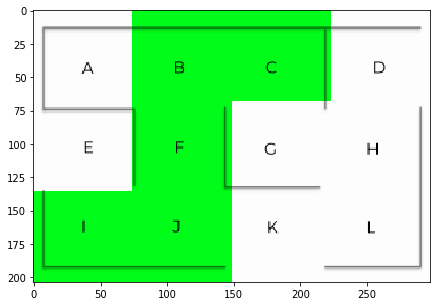

In [16]:
path = find_path('I', 'C')
print('Ideal Path: ', path)
plot_path(path)

### Done!

<hr>